In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
fea = df.iloc[:,:-1]
fea.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# standadization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(fea)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
from sklearn.decomposition import PCA
pca = PCA() # n_components = 2
x_pca = pca.fit(x)
x_pca

PCA()

# explained varience is an attribute of the pca object that tells you how much varience each principle component captures from your data

In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
# cumulative explained varience
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

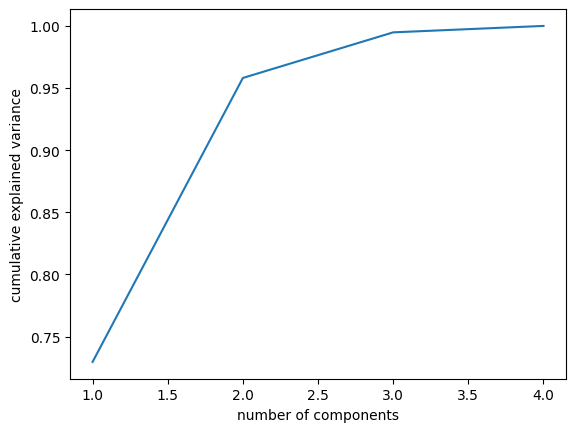

In [ ]:
# plot
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# first two or three components will cover all important features

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
# convert to dataframe for easier plotting
x_pca = pd.DataFrame(x_pca,columns=['PC1','PC2'])
x_pca['species'] = df['species']
x_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


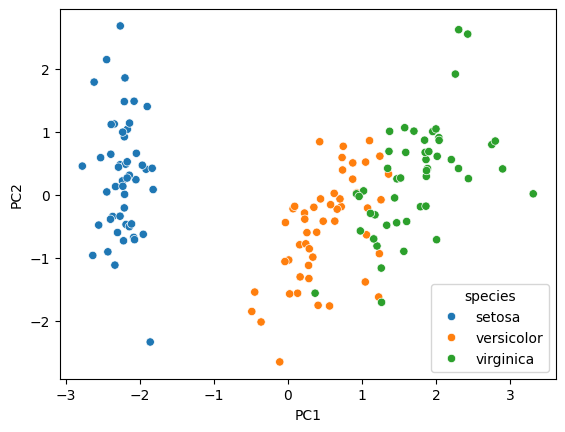

In [ ]:
# plot reduced data
sns.scatterplot(data=x_pca,x='PC1',y='PC2',hue='species')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# feature matrix
x=x_pca[['PC1','PC2']]
# target variable(species)
y = x_pca['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9

# t-SNE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
df = sns.load_dataset('iris')
x = df.iloc[:,:-1]
y = df['species']

In [ ]:
tsne = TSNE(n_components=2,perplexity=30,random_state=42) # to select neighbours (perplexity) number of neighbours
x_tsne = tsne.fit_transform(x)
x_tsne

array([[-2.42846699e+01, -1.96068853e-01],
       [-2.17319050e+01,  6.53882325e-01],
       [-2.17767735e+01, -4.33847994e-01],
       [-2.14130859e+01, -1.41203120e-01],
       [-2.42849083e+01, -6.06253624e-01],
       [-2.62441120e+01, -5.33888757e-01],
       [-2.20059872e+01, -7.92660773e-01],
       [-2.36063728e+01,  8.98885578e-02],
       [-2.08891449e+01, -8.28106523e-01],
       [-2.22197151e+01,  4.80458289e-01],
       [-2.58226967e+01,  8.83378163e-02],
       [-2.29560204e+01,  3.29243898e-01],
       [-2.14609852e+01,  4.00310963e-01],
       [-2.04171238e+01, -7.15105116e-01],
       [-2.71277199e+01,  4.87351343e-02],
       [-2.72579269e+01, -4.86495912e-01],
       [-2.64031487e+01, -2.06707284e-01],
       [-2.43507843e+01, -6.94209263e-02],
       [-2.66233368e+01,  3.07076067e-01],
       [-2.53120079e+01, -6.81390285e-01],
       [-2.52586861e+01,  9.00316954e-01],
       [-2.50500813e+01, -4.59083408e-01],
       [-2.02292347e+01,  2.96012908e-01],
       [-2.

In [ ]:
df_tsne = pd.DataFrame(x_tsne,columns=['Dim1','Dim2'])
df_tsne['species'] = y
df_tsne.head()

,Dim1,Dim2,species
0,-24.284670,-0.196069,setosa
1,-21.731905,0.653882,setosa
2,-21.776773,-0.433848,setosa
3,-21.413086,-0.141203,setosa
4,-24.284908,-0.606254,setosa


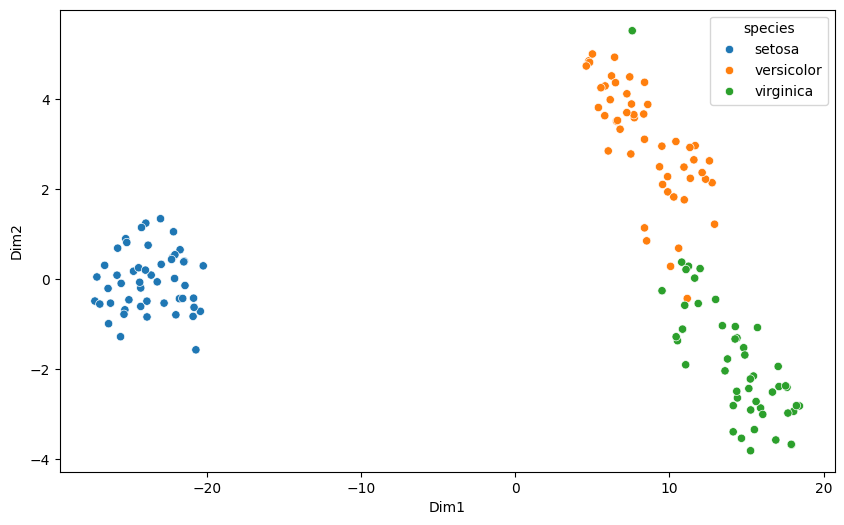

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_tsne,x='Dim1',y='Dim2',hue='species')
plt.show()

In [ ]:
# nonlinear - tsne
# linear - pca

In [ ]:
from sklearn.manifold import trustworthiness
trustworthiness(x, x_tsne)

np.float64(0.9898028169014085)

# LDA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 0.9777777777777777

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



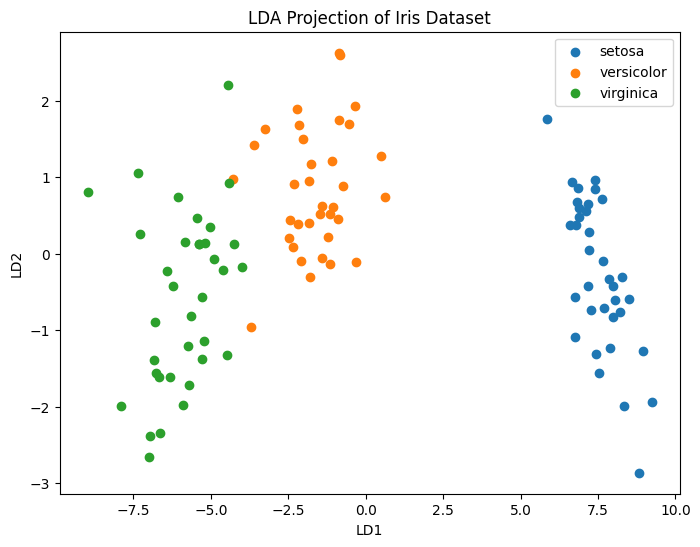

In [ ]:
# Import libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- Step 1: Load dataset ---
iris = sns.load_dataset('iris')
print(iris.head())

# --- Step 2: Separate features and target ---
X = iris.drop('species', axis=1)
y = iris['species']

# --- Step 3: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Step 4: Standardize features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: Apply Linear Discriminant Analysis ---
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# --- Step 6: Train a simple classifier (LDA itself can classify) ---
y_pred = lda.predict(X_test_scaled)

# --- Step 7: Evaluate model ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 8: Visualization ---
plt.figure(figsize=(8,6))
for species in iris['species'].unique():
    plt.scatter(
        X_train_lda[y_train == species, 0],
        X_train_lda[y_train == species, 1],
        label=species
    )
plt.title('LDA Projection of Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()
